In [1]:
!nvidia-smi

Fri Dec  5 20:37:09 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   41C    P8              9W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [2]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [3]:
# Pip install method (recommended)

!pip install ultralytics==8.2.103 -q

from IPython import display
display.clear_output()

# prevent ultralytics from tracking your activity
!yolo settings sync=False

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.2.103 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 38.5/112.6 GB disk)


In [4]:
from ultralytics import YOLO

from IPython.display import display, Image

In [5]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="MQl0ydLK4miy128ZQ3mj")
project = rf.workspace("md-ittesaf-hossain-jpy3t").project("bangladesh-road-vehicles-detecti")
version = project.version(5)
dataset = version.download("yolov8")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 22.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 78.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 116.6 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.12.0.88
    Uninstalling opencv-python-headless-4.12.0.88:
      Successfully uninstalled opencv-python-headless-4.12.0.88
  Attempting uninstall: idna
    Found existing installation: idna 3.11
    Uninstalling idna-3.11:
      Successfully uninstalled idna-3.11


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Bangladesh-Road-Vehicles-Detecti-5 in yolov8:: 100%|██████████| 814/814 [00:00<00:00, 4573.47it/s]


In [2]:
from ultralytics import YOLO

# Load YOLOv8n architecture WITHOUT pretrained weights
# Using 'yolov8n.yaml' (architecture only, no weights)
model = YOLO('yolov8n.yaml')  #  Architecture only, no pretrained weights

# Train from scratch
results = model.train(
    data='/content/Bangladesh-Road-Vehicles-Detecti-5/data.yaml',  # my custom dataset
    epochs=100,              # Increase epochs for from-scratch training
    imgsz=640,
    batch=16,
    name='bd_vehicles_scratch',
    pretrained=False,        #  Explicitly set to False

    # Optimizer settings for from-scratch training
    optimizer='AdamW',       # Good for training from scratch
    lr0=0.001,              # Initial learning rate
    lrf=0.01,               # Final learning rate
    momentum=0.937,
    weight_decay=0.0005,

    # Augmentation
    hsv_h=0.015,
    hsv_s=0.7,
    hsv_v=0.4,
    degrees=10.0,
    translate=0.1,
    scale=0.5,
    fliplr=0.5,
    mosaic=1.0,

    # Training settings
    patience=30,
    save=True,
    device=0,  # GPU (use 'cpu' if no GPU available)
    workers=2,
    verbose=True,
)

print("\n" + "="*50)
print("Training from scratch completed!")
print("="*50)

New https://pypi.org/project/ultralytics/8.3.235 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.2.103 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.yaml, data=/content/Bangladesh-Road-Vehicles-Detecti-5/data.yaml, epochs=100, time=None, patience=30, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=0, workers=2, project=None, name=bd_vehicles_scratch, exist_ok=False, pretrained=False, optimizer=AdamW, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_

100%|██████████| 755k/755k [00:00<00:00, 27.5MB/s]


Overriding model.yaml nc=80 with nc=8

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

100%|██████████| 6.25M/6.25M [00:00<00:00, 113MB/s]


AMP: checks passed ✅


train: Scanning /content/Bangladesh-Road-Vehicles-Detecti-5/train/labels... 300 images, 0 backgrounds, 0 corrupt: 100%|██████████| 300/300 [00:00<00:00, 1592.65it/s]


train: New cache created: /content/Bangladesh-Road-Vehicles-Detecti-5/train/labels.cache
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 2401, len(boxes) = 2911. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


/usr/local/lib/python3.12/dist-packages/ultralytics/data/augment.py:1837: UserWarning: Argument(s) 'quality_lower' are not valid for transform ImageCompression
  A.ImageCompression(quality_lower=75, p=0.0),
val: Scanning /content/Bangladesh-Road-Vehicles-Detecti-5/valid/labels... 60 images, 0 backgrounds, 0 corrupt: 100%|██████████| 60/60 [00:00<00:00, 717.07it/s]

val: New cache created: /content/Bangladesh-Road-Vehicles-Detecti-5/valid/labels.cache
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 563, len(boxes) = 709. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.


Plotting labels to runs/detect/bd_vehicles_scratch/labels.jpg... 
optimizer: AdamW(lr=0.001, momentum=0.937) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/bd_vehicles_scratch
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      2.71G      3.685      4.364      3.914        167        640: 100%|██████████| 19/19 [00:07<00:00,  2.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.05s/it]

                   all         60        709   0.000146      0.008   8.07e-05   2.72e-05



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      3.17G      3.705      4.058      3.387        142        640: 100%|██████████| 19/19 [00:05<00:00,  3.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.76it/s]

                   all         60        709   4.17e-05    0.00229    2.3e-05   7.38e-06



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      2.59G      3.682       4.04      3.208        180        640: 100%|██████████| 19/19 [00:05<00:00,  3.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.08it/s]

                   all         60        709    0.00048     0.0494   0.000776   0.000238



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      2.58G      3.714      3.905      3.139        219        640: 100%|██████████| 19/19 [00:04<00:00,  3.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.04it/s]

                   all         60        709   0.000414     0.0453   0.000905   0.000304



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      3.19G      3.531      3.846      3.068        166        640: 100%|██████████| 19/19 [00:05<00:00,  3.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.65it/s]

                   all         60        709    0.00043     0.0471   0.000522   0.000151



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      2.68G      3.438      3.842      3.022        135        640: 100%|██████████| 19/19 [00:04<00:00,  4.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.29it/s]

                   all         60        709    0.00453     0.0534    0.00413    0.00107



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      2.58G      3.294      3.795      2.946        199        640: 100%|██████████| 19/19 [00:05<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.34it/s]

                   all         60        709    0.00615      0.111    0.00739    0.00206



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      2.75G      3.235      3.862      2.952        140        640: 100%|██████████| 19/19 [00:04<00:00,  4.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.44it/s]

                   all         60        709      0.818     0.0143     0.0129    0.00261



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      2.61G      3.148       3.78      2.879        261        640: 100%|██████████| 19/19 [00:05<00:00,  3.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.36it/s]

                   all         60        709      0.773     0.0129     0.0132     0.0035



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      2.72G       3.04        3.7      2.794        151        640: 100%|██████████| 19/19 [00:04<00:00,  4.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.15it/s]

                   all         60        709      0.399     0.0309      0.012    0.00395



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      2.77G      3.027      3.619      2.776        340        640: 100%|██████████| 19/19 [00:05<00:00,  3.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.02it/s]

                   all         60        709      0.177      0.041     0.0184    0.00612



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      3.05G      2.976      3.614      2.716        240        640: 100%|██████████| 19/19 [00:05<00:00,  3.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.41it/s]

                   all         60        709      0.402     0.0653     0.0347     0.0113



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      3.06G      2.912      3.533      2.703        207        640: 100%|██████████| 19/19 [00:04<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.39it/s]

                   all         60        709      0.539     0.0265     0.0197    0.00658



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      2.63G       2.86      3.512      2.674        200        640: 100%|██████████| 19/19 [00:04<00:00,  3.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.56it/s]

                   all         60        709      0.777     0.0167      0.015    0.00464



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100       2.6G      2.804      3.429      2.626        192        640: 100%|██████████| 19/19 [00:04<00:00,  4.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.00it/s]

                   all         60        709      0.669     0.0305     0.0299    0.00905



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      2.86G      2.763      3.409      2.571        140        640: 100%|██████████| 19/19 [00:05<00:00,  3.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.99it/s]

                   all         60        709      0.302     0.0861     0.0166    0.00545



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      2.59G      2.729       3.38      2.584         97        640: 100%|██████████| 19/19 [00:04<00:00,  4.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  2.00it/s]

                   all         60        709      0.396     0.0859     0.0456     0.0199



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      2.67G       2.72      3.407      2.564        117        640: 100%|██████████| 19/19 [00:05<00:00,  3.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.23it/s]

                   all         60        709      0.418     0.0583     0.0444     0.0186



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      2.64G      2.691      3.394      2.576        107        640: 100%|██████████| 19/19 [00:04<00:00,  4.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.36it/s]

                   all         60        709      0.414     0.0889     0.0583     0.0333



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      2.36G      2.668      3.333      2.539        182        640: 100%|██████████| 19/19 [00:05<00:00,  3.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.51it/s]

                   all         60        709      0.574     0.0676     0.0471     0.0202



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      2.53G      2.645      3.279      2.532        165        640: 100%|██████████| 19/19 [00:04<00:00,  4.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.46it/s]

                   all         60        709      0.361     0.0833     0.0573     0.0237



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      2.59G      2.569      3.282      2.475        151        640: 100%|██████████| 19/19 [00:05<00:00,  3.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.28it/s]

                   all         60        709      0.401     0.0655     0.0681     0.0352



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      2.35G      2.576      3.219      2.467        227        640: 100%|██████████| 19/19 [00:04<00:00,  4.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.08it/s]

                   all         60        709      0.602     0.0733     0.0839     0.0426



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100       2.6G      2.544      3.162      2.425        214        640: 100%|██████████| 19/19 [00:05<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.38it/s]

                   all         60        709      0.319      0.105     0.0698     0.0375



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      2.55G      2.487      3.167      2.425        181        640: 100%|██████████| 19/19 [00:04<00:00,  4.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.07it/s]

                   all         60        709      0.235       0.11     0.0696     0.0313



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      2.46G      2.553      3.114      2.371        127        640: 100%|██████████| 19/19 [00:05<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.44it/s]

                   all         60        709      0.205      0.102     0.0754     0.0359



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      2.67G      2.521      3.131      2.375        225        640: 100%|██████████| 19/19 [00:04<00:00,  4.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.27it/s]

                   all         60        709      0.246     0.0827     0.0708     0.0306



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      2.62G       2.55      3.131      2.388         86        640: 100%|██████████| 19/19 [00:05<00:00,  3.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.46it/s]

                   all         60        709      0.169     0.0718     0.0855     0.0358



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      2.78G      2.482      3.076      2.359        182        640: 100%|██████████| 19/19 [00:04<00:00,  4.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.72it/s]

                   all         60        709      0.204      0.122      0.088     0.0324



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      2.42G      2.443      3.071      2.363        191        640: 100%|██████████| 19/19 [00:04<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.58it/s]

                   all         60        709      0.257      0.116      0.078     0.0314



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      2.86G       2.41      3.015      2.328        194        640: 100%|██████████| 19/19 [00:04<00:00,  4.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.51it/s]

                   all         60        709      0.179      0.119     0.0774     0.0343



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      2.79G      2.439      2.988      2.332        202        640: 100%|██████████| 19/19 [00:04<00:00,  4.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.45it/s]

                   all         60        709      0.347     0.0988     0.0693      0.024



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100       2.5G      2.412      2.977      2.326        134        640: 100%|██████████| 19/19 [00:04<00:00,  3.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.45it/s]

                   all         60        709      0.354      0.104     0.0917     0.0374



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      2.72G      2.419      2.935      2.298        205        640: 100%|██████████| 19/19 [00:04<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.99it/s]

                   all         60        709      0.357      0.084     0.0889     0.0373



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      2.86G      2.377       2.92      2.291        136        640: 100%|██████████| 19/19 [00:05<00:00,  3.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.93it/s]

                   all         60        709      0.319      0.103      0.105     0.0487



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      3.02G      2.349      2.934      2.286        207        640: 100%|██████████| 19/19 [00:04<00:00,  4.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.61it/s]

                   all         60        709      0.438     0.0951      0.109     0.0505



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      2.87G      2.369      2.842      2.214        292        640: 100%|██████████| 19/19 [00:05<00:00,  3.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.24it/s]

                   all         60        709      0.494      0.122      0.113      0.045



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      3.07G      2.334      2.847       2.23        175        640: 100%|██████████| 19/19 [00:04<00:00,  4.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.39it/s]

                   all         60        709      0.341      0.115     0.0952     0.0355



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      3.25G      2.343      2.803       2.23        148        640: 100%|██████████| 19/19 [00:05<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.29it/s]

                   all         60        709      0.155      0.107     0.0992     0.0406



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      3.18G      2.292      2.777      2.206        200        640: 100%|██████████| 19/19 [00:04<00:00,  4.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.86it/s]

                   all         60        709      0.227     0.0982     0.0963     0.0415



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100       2.8G      2.326      2.755      2.207        154        640: 100%|██████████| 19/19 [00:05<00:00,  3.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.72it/s]

                   all         60        709      0.287     0.0953     0.0951     0.0401



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      2.64G      2.313      2.749      2.214        120        640: 100%|██████████| 19/19 [00:04<00:00,  4.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.15it/s]

                   all         60        709      0.359     0.0959     0.0946      0.039



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      2.68G      2.307      2.744      2.207        204        640: 100%|██████████| 19/19 [00:05<00:00,  3.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.45it/s]

                   all         60        709      0.377      0.123      0.104     0.0412



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      2.49G      2.267      2.694      2.208        128        640: 100%|██████████| 19/19 [00:04<00:00,  4.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.36it/s]

                   all         60        709      0.225      0.153      0.118     0.0444



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      2.66G      2.277      2.659      2.184        252        640: 100%|██████████| 19/19 [00:05<00:00,  3.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.33it/s]

                   all         60        709      0.202      0.139      0.114     0.0408



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      2.63G      2.325      2.696      2.181        219        640: 100%|██████████| 19/19 [00:04<00:00,  4.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.21it/s]

                   all         60        709      0.222      0.135      0.122     0.0534



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      2.67G      2.202      2.643      2.171        265        640: 100%|██████████| 19/19 [00:05<00:00,  3.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.67it/s]

                   all         60        709      0.421     0.0943     0.0955     0.0367



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      2.38G      2.277       2.67      2.168         91        640: 100%|██████████| 19/19 [00:04<00:00,  4.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.31it/s]

                   all         60        709      0.427      0.113      0.114     0.0443



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100       2.9G      2.231      2.633      2.133        149        640: 100%|██████████| 19/19 [00:05<00:00,  3.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.51it/s]

                   all         60        709      0.188      0.163      0.111     0.0405



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      2.87G      2.224      2.619      2.152        204        640: 100%|██████████| 19/19 [00:04<00:00,  4.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.53it/s]

                   all         60        709      0.187      0.179      0.133     0.0518



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      2.75G      2.192      2.593      2.129        309        640: 100%|██████████| 19/19 [00:04<00:00,  4.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.41it/s]

                   all         60        709      0.265      0.124      0.126      0.053



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      2.91G      2.223      2.608      2.123        249        640: 100%|██████████| 19/19 [00:04<00:00,  3.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.73it/s]

                   all         60        709      0.356      0.123      0.144     0.0588



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      2.46G      2.206      2.589      2.133        290        640: 100%|██████████| 19/19 [00:04<00:00,  4.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.21it/s]

                   all         60        709      0.268      0.129      0.156     0.0616



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      2.62G      2.193      2.528      2.105        144        640: 100%|██████████| 19/19 [00:04<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.63it/s]

                   all         60        709      0.421      0.122      0.136     0.0569



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      2.44G      2.164      2.495      2.097        169        640: 100%|██████████| 19/19 [00:04<00:00,  4.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.65it/s]

                   all         60        709      0.537     0.0946       0.12      0.046



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      2.71G      2.188      2.532      2.116        220        640: 100%|██████████| 19/19 [00:04<00:00,  3.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.61it/s]

                   all         60        709      0.265      0.157      0.156     0.0693



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      2.61G      2.182      2.486      2.099        203        640: 100%|██████████| 19/19 [00:04<00:00,  4.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.20it/s]

                   all         60        709      0.206      0.155      0.132     0.0559



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      2.91G      2.151      2.518      2.096        168        640: 100%|██████████| 19/19 [00:05<00:00,  3.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.74it/s]

                   all         60        709      0.167      0.174      0.136     0.0521



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      2.75G      2.167      2.469      2.095        251        640: 100%|██████████| 19/19 [00:04<00:00,  4.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.42it/s]

                   all         60        709      0.251      0.154      0.143      0.056



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      2.87G      2.142      2.483      2.105        250        640: 100%|██████████| 19/19 [00:05<00:00,  3.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.65it/s]

                   all         60        709      0.208      0.146      0.143     0.0563



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      2.49G      2.119      2.402      2.045        138        640: 100%|██████████| 19/19 [00:04<00:00,  4.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.36it/s]

                   all         60        709      0.238      0.189      0.148     0.0608



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      2.79G      2.122      2.472      2.089        142        640: 100%|██████████| 19/19 [00:05<00:00,  3.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.20it/s]

                   all         60        709      0.245      0.174      0.152     0.0573



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      2.83G      2.178      2.433      2.073        172        640: 100%|██████████| 19/19 [00:04<00:00,  4.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.17it/s]

                   all         60        709      0.174      0.184      0.144     0.0608



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      2.91G      2.152       2.47      2.075        186        640: 100%|██████████| 19/19 [00:05<00:00,  3.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.53it/s]

                   all         60        709       0.17       0.16      0.132     0.0496



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      2.69G      2.137      2.484      2.091        146        640: 100%|██████████| 19/19 [00:04<00:00,  4.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.51it/s]

                   all         60        709       0.44      0.158       0.15     0.0587



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100       2.6G      2.118      2.441      2.065        164        640: 100%|██████████| 19/19 [00:05<00:00,  3.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.36it/s]

                   all         60        709      0.227      0.217      0.159     0.0682



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      2.48G      2.111      2.345      2.043        128        640: 100%|██████████| 19/19 [00:04<00:00,  4.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.29it/s]

                   all         60        709      0.222      0.194      0.161     0.0592



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100       2.6G      2.119      2.361      2.046        173        640: 100%|██████████| 19/19 [00:05<00:00,  3.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.73it/s]

                   all         60        709      0.189      0.167      0.143     0.0542



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      2.59G      2.069      2.364      2.026        232        640: 100%|██████████| 19/19 [00:04<00:00,  4.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.58it/s]

                   all         60        709      0.203      0.164      0.142     0.0549



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      2.72G      2.094       2.46      2.064         95        640: 100%|██████████| 19/19 [00:05<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.54it/s]

                   all         60        709      0.259      0.166      0.154     0.0629



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      2.86G        2.1        2.4      2.052        201        640: 100%|██████████| 19/19 [00:04<00:00,  4.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.44it/s]

                   all         60        709      0.392      0.147      0.138     0.0542



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      2.57G      2.115      2.309      2.018        185        640: 100%|██████████| 19/19 [00:05<00:00,  3.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.72it/s]

                   all         60        709      0.151      0.184      0.139     0.0594



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      2.76G      2.066      2.385      2.035        207        640: 100%|██████████| 19/19 [00:04<00:00,  4.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.25it/s]

                   all         60        709      0.282      0.159      0.155      0.065



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      2.78G      2.058      2.302       2.03        149        640: 100%|██████████| 19/19 [00:05<00:00,  3.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.43it/s]

                   all         60        709       0.23      0.188      0.162      0.066



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100       2.6G      2.097      2.318      2.035        140        640: 100%|██████████| 19/19 [00:04<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.89it/s]

                   all         60        709        0.2      0.197      0.159     0.0624



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      2.92G      2.078      2.335      2.006        382        640: 100%|██████████| 19/19 [00:05<00:00,  3.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.21it/s]

                   all         60        709      0.372       0.16      0.184     0.0781



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      2.75G      2.118      2.302       2.02        160        640: 100%|██████████| 19/19 [00:04<00:00,  4.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.48it/s]

                   all         60        709      0.322      0.179      0.173     0.0763



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      2.58G      2.085      2.277      2.024        215        640: 100%|██████████| 19/19 [00:05<00:00,  3.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.43it/s]

                   all         60        709      0.247      0.201      0.168     0.0699



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      2.59G      2.027      2.201      1.981        129        640: 100%|██████████| 19/19 [00:04<00:00,  4.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.57it/s]

                   all         60        709       0.37      0.186       0.18     0.0654



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      2.89G      2.051      2.236      1.998        134        640: 100%|██████████| 19/19 [00:05<00:00,  3.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.74it/s]

                   all         60        709      0.438      0.162      0.153     0.0633



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100       2.5G      2.046      2.279      2.007        304        640: 100%|██████████| 19/19 [00:04<00:00,  4.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.45it/s]

                   all         60        709      0.301      0.187       0.17     0.0673



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      2.67G      2.016      2.258      1.986        144        640: 100%|██████████| 19/19 [00:05<00:00,  3.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.52it/s]

                   all         60        709      0.255      0.196      0.179     0.0712



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100       2.6G      2.054      2.237      2.009        267        640: 100%|██████████| 19/19 [00:04<00:00,  4.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.36it/s]

                   all         60        709      0.306      0.166      0.178     0.0734



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      3.05G      2.075      2.281      2.027        221        640: 100%|██████████| 19/19 [00:05<00:00,  3.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.86it/s]

                   all         60        709      0.286      0.201      0.182     0.0725



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      2.53G      2.032      2.242      1.995        314        640: 100%|██████████| 19/19 [00:04<00:00,  4.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.55it/s]

                   all         60        709      0.332      0.216      0.199     0.0852



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      2.66G      1.987      2.212      1.962        166        640: 100%|██████████| 19/19 [00:05<00:00,  3.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.45it/s]

                   all         60        709       0.44      0.203      0.199     0.0875



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100      2.52G      2.006      2.186       1.98        203        640: 100%|██████████| 19/19 [00:04<00:00,  4.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.62it/s]

                   all         60        709      0.408      0.208      0.207     0.0832



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      2.67G       2.03      2.195      1.973        372        640: 100%|██████████| 19/19 [00:05<00:00,  3.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.79it/s]

                   all         60        709      0.492      0.154      0.186     0.0787



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      2.74G      1.984      2.199      1.976        242        640: 100%|██████████| 19/19 [00:04<00:00,  4.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.79it/s]

                   all         60        709      0.397      0.175      0.183     0.0791



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      2.96G      2.002      2.124      1.946        186        640: 100%|██████████| 19/19 [00:05<00:00,  3.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.30it/s]

                   all         60        709      0.294      0.211      0.182      0.075


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


/usr/local/lib/python3.12/dist-packages/ultralytics/data/augment.py:1837: UserWarning: Argument(s) 'quality_lower' are not valid for transform ImageCompression
  A.ImageCompression(quality_lower=75, p=0.0),



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100      2.54G      1.934      2.077      1.929         88        640: 100%|██████████| 19/19 [00:06<00:00,  3.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.42it/s]

                   all         60        709      0.313      0.207      0.186     0.0761



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100      2.57G      1.962       2.09      1.955        185        640: 100%|██████████| 19/19 [00:04<00:00,  4.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.57it/s]

                   all         60        709      0.328      0.203       0.18     0.0762



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100      2.59G      1.876      2.029      1.908         58        640: 100%|██████████| 19/19 [00:04<00:00,  4.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.47it/s]

                   all         60        709      0.342      0.188      0.189       0.09



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100      2.54G      1.922       2.01      1.907        100        640: 100%|██████████| 19/19 [00:04<00:00,  4.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.86it/s]

                   all         60        709      0.364      0.208      0.203     0.0971



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      2.34G      1.904      2.017       1.94         81        640: 100%|██████████| 19/19 [00:04<00:00,  4.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.44it/s]

                   all         60        709      0.392      0.225      0.208     0.0979



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      2.36G      1.889      1.971      1.904         65        640: 100%|██████████| 19/19 [00:04<00:00,  4.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.17it/s]

                   all         60        709      0.322      0.216      0.205     0.0923



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100      2.51G      1.877      1.964       1.89         56        640: 100%|██████████| 19/19 [00:04<00:00,  4.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.61it/s]

                   all         60        709      0.378      0.208      0.203     0.0915



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100      2.63G      1.837      1.951      1.894        127        640: 100%|██████████| 19/19 [00:04<00:00,  4.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.74it/s]

                   all         60        709      0.354      0.217      0.199      0.086



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100       2.6G      1.868      1.954       1.91        175        640: 100%|██████████| 19/19 [00:04<00:00,  4.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.52it/s]

                   all         60        709      0.315       0.23      0.199     0.0866



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100       2.6G      1.852      1.944      1.893         95        640: 100%|██████████| 19/19 [00:04<00:00,  4.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.15it/s]

                   all         60        709       0.32      0.236      0.202     0.0853



100 epochs completed in 0.189 hours.
Optimizer stripped from runs/detect/bd_vehicles_scratch/weights/last.pt, 6.3MB
Optimizer stripped from runs/detect/bd_vehicles_scratch/weights/best.pt, 6.3MB

Validating runs/detect/bd_vehicles_scratch/weights/best.pt...
Ultralytics YOLOv8.2.103 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
YOLOv8n summary (fused): 168 layers, 3,007,208 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.24it/s]


                   all         60        709      0.391      0.226      0.208     0.0978
                   bus         20         92      0.348      0.141      0.116     0.0311
                   car         29        328      0.389      0.454      0.416      0.162
                   cng         25         91      0.348     0.0879       0.11     0.0354
                 cycle         12         16      0.449      0.106      0.125     0.0599
            motorcycle         27         71      0.344      0.155      0.139     0.0447
              rickshaw         15         76      0.163     0.0658     0.0427    0.00937
                 truck         18         29      0.344       0.31      0.275      0.129
                   van          5          6      0.744      0.488      0.442      0.311
Speed: 0.2ms preprocess, 2.0ms inference, 0.0ms loss, 3.9ms postprocess per image
Results saved to runs/detect/bd_vehicles_scratch

Training from scratch completed!


In [3]:
# Validate on validation set
metrics_exp1 = model.val()

# Extract metrics
map50 = metrics_exp1.box.map50
map50_95 = metrics_exp1.box.map
precision = metrics_exp1.box.mp
recall = metrics_exp1.box.mr
f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

Ultralytics YOLOv8.2.103 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
YOLOv8n summary (fused): 168 layers, 3,007,208 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /content/Bangladesh-Road-Vehicles-Detecti-5/valid/labels.cache... 60 images, 0 backgrounds, 0 corrupt: 100%|██████████| 60/60 [00:00<?, ?it/s]

WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 563, len(boxes) = 709. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.34it/s]


                   all         60        709      0.389      0.226      0.208     0.0977
                   bus         20         92       0.35      0.141      0.116     0.0314
                   car         29        328       0.39      0.454      0.417      0.161
                   cng         25         91      0.347     0.0879       0.11     0.0353
                 cycle         12         16      0.441      0.103      0.125     0.0599
            motorcycle         27         71      0.333      0.155      0.139     0.0444
              rickshaw         15         76      0.163     0.0658     0.0426    0.00977
                 truck         18         29      0.343       0.31      0.274      0.128
                   van          5          6      0.744      0.488      0.442      0.311
Speed: 0.3ms preprocess, 14.1ms inference, 0.0ms loss, 10.5ms postprocess per image
Results saved to runs/detect/bd_vehicles_scratch2


### Confusion Matrix
The confusion matrix provides a detailed breakdown of correct and incorrect predictions for each class. It helps in understanding false positives, false negatives, and overall model performance per class. The Ultralytics `val()` function automatically saves this plot.


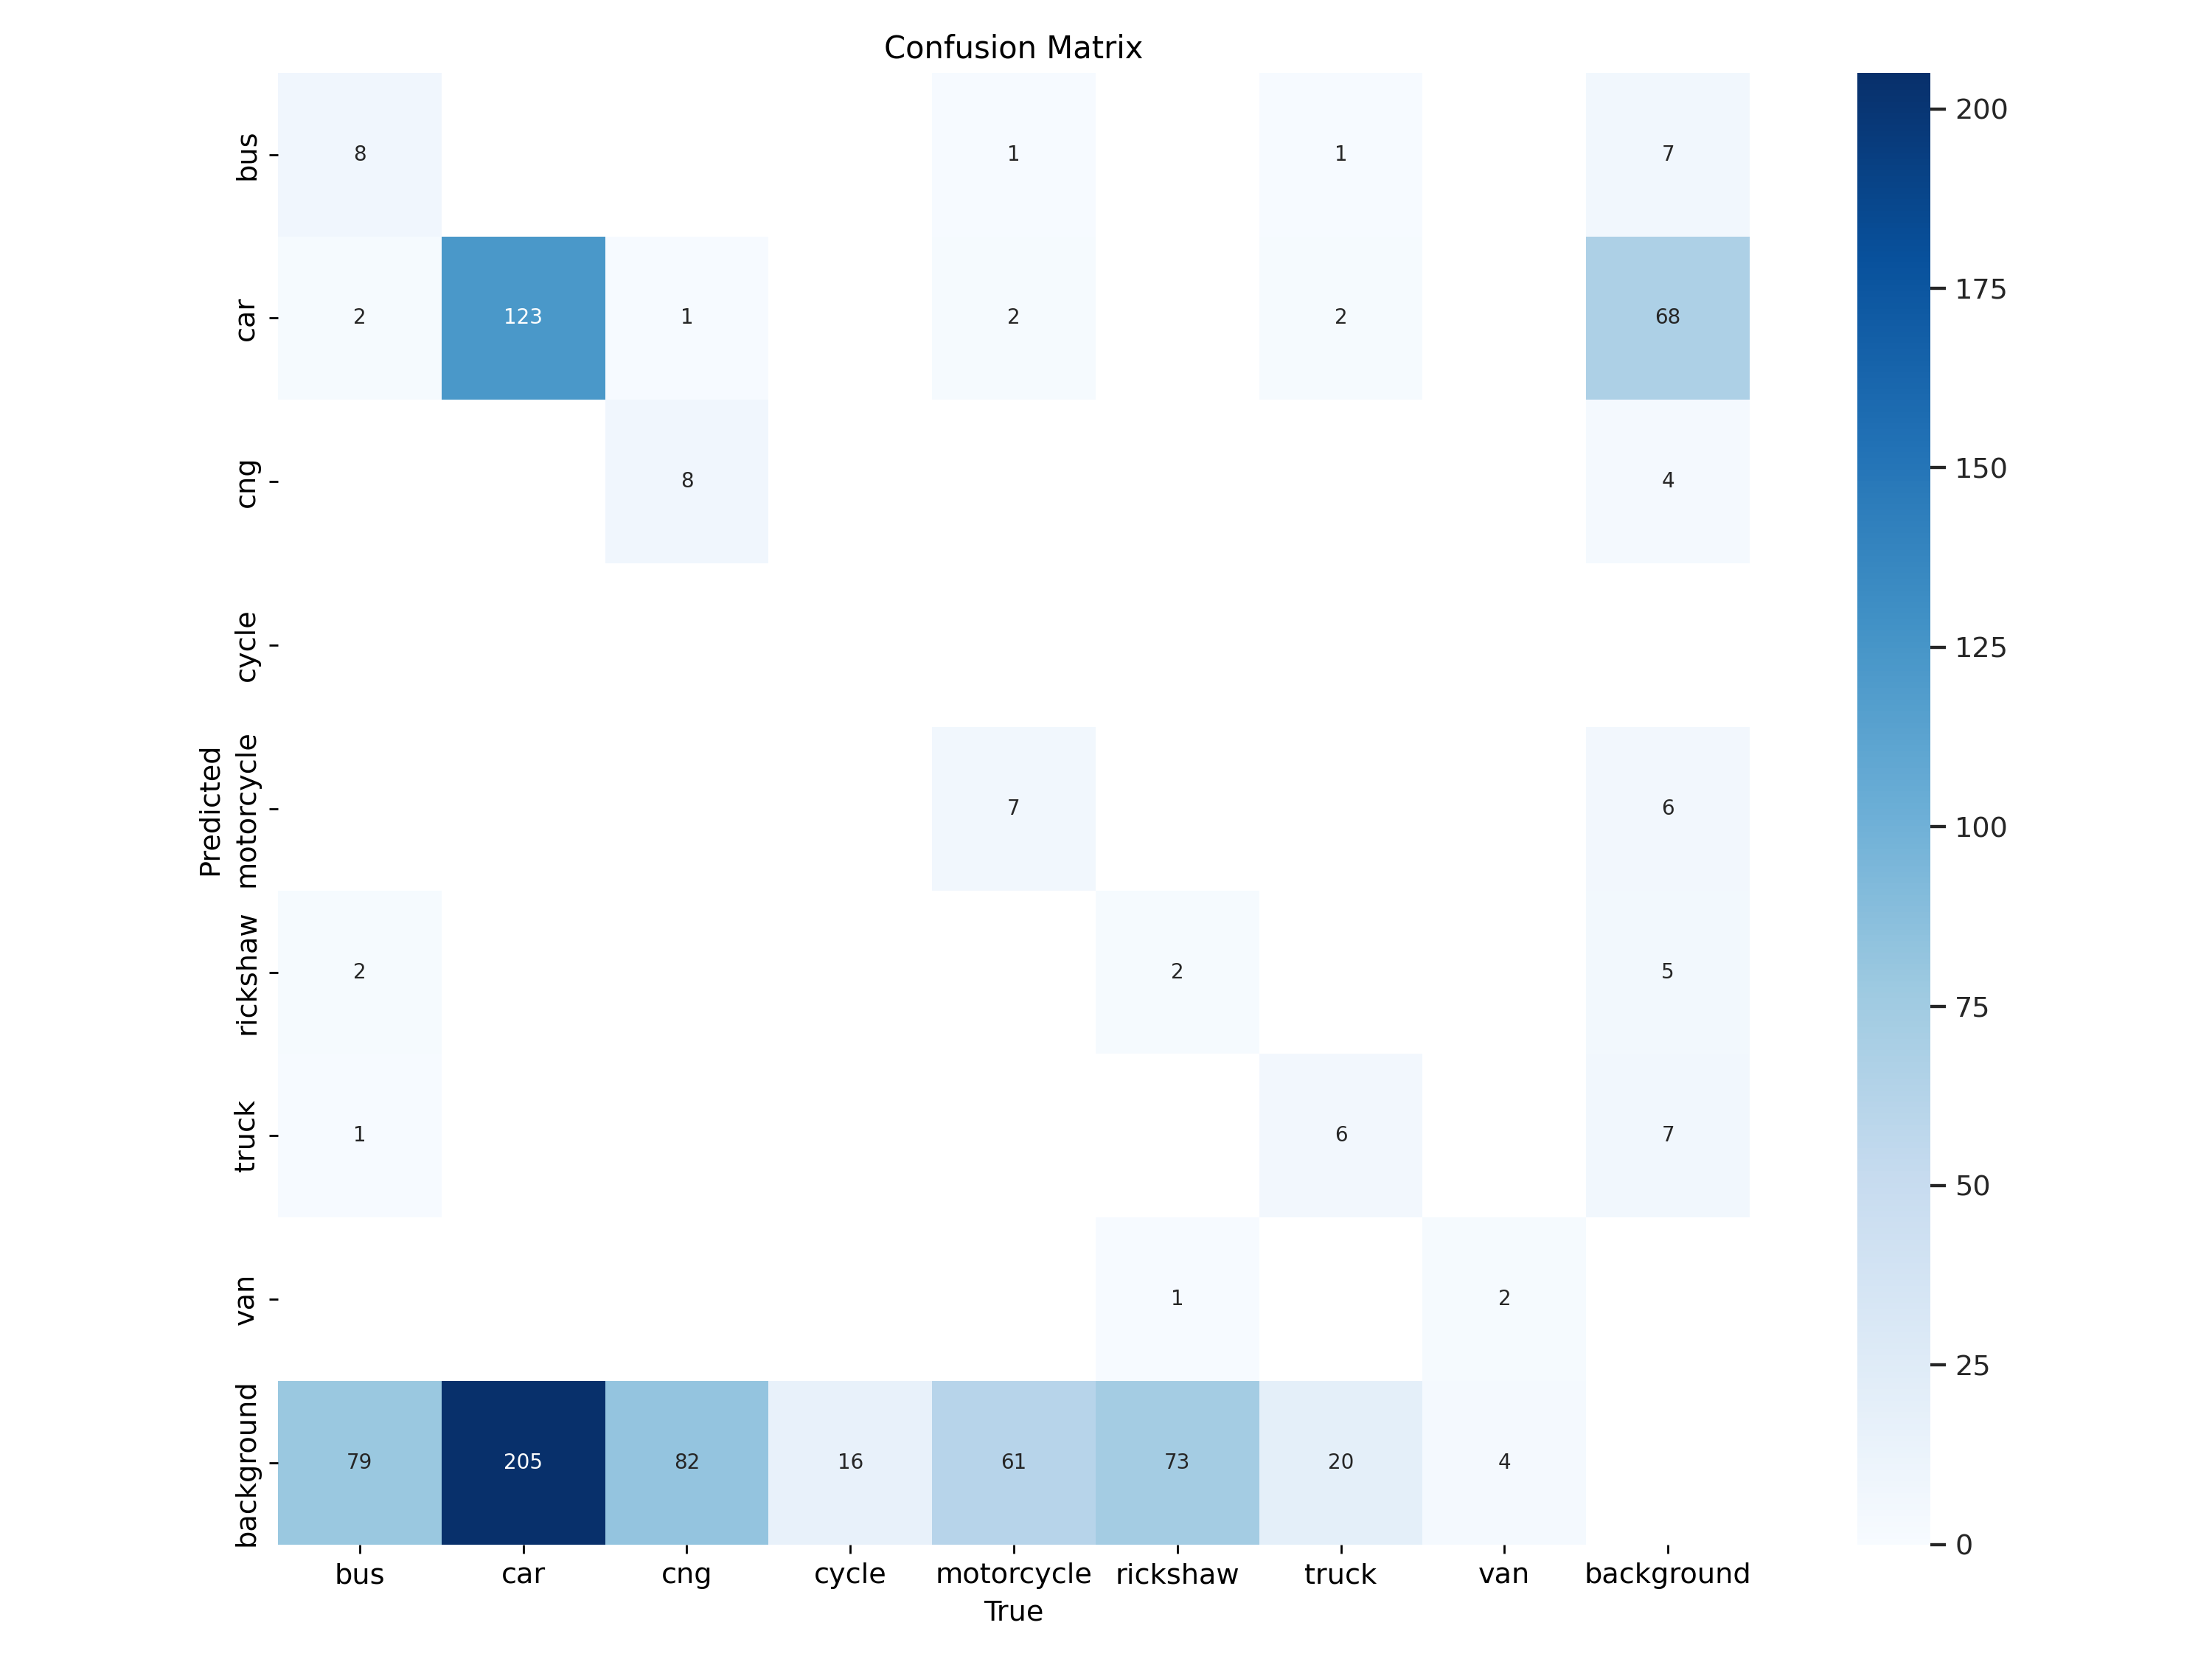

In [4]:
from IPython.display import Image, display

# Display the confusion matrix saved during validation
confusion_matrix_path = 'runs/detect/bd_vehicles_scratch/confusion_matrix.png'
display(Image(filename=confusion_matrix_path))

### Per-Class Metrics
If you need to access precision, recall, or F1-score for individual classes, you can do so from the `metrics_exp1.box` object. For example, to get precision for each class:


In [5]:
# Access per-class precision and recall
class_names = model.names # Get class names
print("Per-Class Precision:")
for i, p in enumerate(metrics_exp1.box.p):
    print(f"  {class_names[i]}: {p:.4f}")

print("\nPer-Class Recall:")
for i, r in enumerate(metrics_exp1.box.r):
    print(f"  {class_names[i]}: {r:.4f}")

# Calculate and print per-class F1-score
print("\nPer-Class F1-Score:")
for i in range(len(class_names)):
    p_class = metrics_exp1.box.p[i]
    r_class = metrics_exp1.box.r[i]
    f1_class = 2 * (p_class * r_class) / (p_class + r_class) if (p_class + r_class) > 0 else 0
    print(f"  {class_names[i]}: {f1_class:.4f}")

Per-Class Precision:
  bus: 0.3497
  car: 0.3904
  cng: 0.3472
  cycle: 0.4407
  motorcycle: 0.3329
  rickshaw: 0.1632
  truck: 0.3425
  van: 0.7441

Per-Class Recall:
  bus: 0.1413
  car: 0.4543
  cng: 0.0879
  cycle: 0.1028
  motorcycle: 0.1549
  rickshaw: 0.0658
  truck: 0.3103
  van: 0.4882

Per-Class F1-Score:
  bus: 0.2013
  car: 0.4199
  cng: 0.1403
  cycle: 0.1666
  motorcycle: 0.2115
  rickshaw: 0.0938
  truck: 0.3257
  van: 0.5896


Different hyperparameters (epochs,batch size)

In [6]:
from ultralytics import YOLO

# Load YOLOv8n architecture WITHOUT pretrained weights
# Using 'yolov8n.yaml' (architecture only, no weights)
model = YOLO('yolov8n.yaml')  #  Architecture only, no pretrained weights

# Train from scratch
results = model.train(
    data='/content/Bangladesh-Road-Vehicles-Detecti-5/data.yaml',  # my custom dataset
    epochs=150,              # Increase epochs for from-scratch training
    imgsz=640,
    batch=8,
    name='bd_vehicles_scratch',
    pretrained=False,        #  Explicitly set to False

    # Optimizer settings for from-scratch training
    optimizer='AdamW',       # Good for training from scratch
    lr0=0.001,              # Initial learning rate
    lrf=0.01,               # Final learning rate
    momentum=0.937,
    weight_decay=0.0005,

    # Augmentation
    hsv_h=0.015,
    hsv_s=0.7,
    hsv_v=0.4,
    degrees=10.0,
    translate=0.1,
    scale=0.5,
    fliplr=0.5,
    mosaic=1.0,

    # Training settings
    patience=30,
    save=True,
    device=0,  # GPU (use 'cpu' if no GPU available)
    workers=2,
    verbose=True,
)

print("\n" + "="*50)
print("Training from scratch completed!")
print("="*50)

New https://pypi.org/project/ultralytics/8.3.235 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.2.103 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.yaml, data=/content/Bangladesh-Road-Vehicles-Detecti-5/data.yaml, epochs=150, time=None, patience=30, batch=8, imgsz=640, save=True, save_period=-1, cache=False, device=0, workers=2, project=None, name=bd_vehicles_scratch3, exist_ok=False, pretrained=False, optimizer=AdamW, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_

train: Scanning /content/Bangladesh-Road-Vehicles-Detecti-5/train/labels.cache... 300 images, 0 backgrounds, 0 corrupt: 100%|██████████| 300/300 [00:00<?, ?it/s]

WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 2401, len(boxes) = 2911. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))



/usr/local/lib/python3.12/dist-packages/ultralytics/data/augment.py:1837: UserWarning: Argument(s) 'quality_lower' are not valid for transform ImageCompression
  A.ImageCompression(quality_lower=75, p=0.0),
val: Scanning /content/Bangladesh-Road-Vehicles-Detecti-5/valid/labels.cache... 60 images, 0 backgrounds, 0 corrupt: 100%|██████████| 60/60 [00:00<?, ?it/s]

WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 563, len(boxes) = 709. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.


Plotting labels to runs/detect/bd_vehicles_scratch3/labels.jpg... 
optimizer: AdamW(lr=0.001, momentum=0.937) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/bd_vehicles_scratch3
Starting training for 150 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/150      1.43G      3.728       4.32      3.829         75        640: 100%|██████████| 38/38 [00:07<00:00,  5.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.14it/s]

                   all         60        709   0.000118    0.00648   7.81e-05   2.79e-05



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/150      1.36G      3.709      4.085      3.447         42        640: 100%|██████████| 38/38 [00:05<00:00,  6.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.90it/s]

                   all         60        709   0.000153    0.00838   0.000111   2.73e-05



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/150      1.51G      3.693      4.007      3.316         26        640: 100%|██████████| 38/38 [00:07<00:00,  5.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.72it/s]

                   all         60        709    0.00137      0.143     0.0028   0.000677



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/150      1.46G      3.566       3.96      3.223         60        640: 100%|██████████| 38/38 [00:06<00:00,  5.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.03it/s]

                   all         60        709    0.00496      0.149    0.00417    0.00107



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/150       1.7G        3.5      3.932      3.178         31        640: 100%|██████████| 38/38 [00:06<00:00,  5.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.45it/s]

                   all         60        709    0.00502        0.2    0.00586    0.00171



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/150      1.48G      3.372      3.949      3.138         25        640: 100%|██████████| 38/38 [00:06<00:00,  5.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.82it/s]

                   all         60        709      0.398     0.0215    0.00547     0.0014



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/150      1.71G      3.275      3.865      3.095         76        640: 100%|██████████| 38/38 [00:05<00:00,  6.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.13it/s]

                   all         60        709      0.512     0.0341     0.0129    0.00273



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/150      1.66G      3.196      3.898      3.035         51        640: 100%|██████████| 38/38 [00:06<00:00,  5.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.59it/s]

                   all         60        709    0.00962      0.144     0.0157     0.0046



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/150      1.47G      3.161      3.842      2.984         38        640: 100%|██████████| 38/38 [00:06<00:00,  6.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.96it/s]


                   all         60        709      0.666      0.021     0.0192    0.00488

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/150      1.51G      3.005      3.756       2.91         79        640: 100%|██████████| 38/38 [00:05<00:00,  6.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.99it/s]

                   all         60        709       0.56     0.0302     0.0282    0.00608



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/150      1.61G      2.946      3.716      2.848         32        640: 100%|██████████| 38/38 [00:06<00:00,  5.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.08it/s]

                   all         60        709      0.671     0.0237     0.0183    0.00594



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/150      1.63G      2.921      3.675      2.848         43        640: 100%|██████████| 38/38 [00:05<00:00,  6.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.53it/s]

                   all         60        709       0.53     0.0274      0.018    0.00612



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/150       1.4G      2.845      3.683      2.815         95        640: 100%|██████████| 38/38 [00:06<00:00,  5.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.26it/s]

                   all         60        709      0.414     0.0304     0.0207    0.00672



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/150      1.42G      2.771      3.651      2.752         86        640: 100%|██████████| 38/38 [00:05<00:00,  6.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.93it/s]


                   all         60        709     0.0442     0.0704     0.0237    0.00998

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/150      1.42G      2.796      3.595      2.737        169        640: 100%|██████████| 38/38 [00:05<00:00,  6.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.31it/s]

                   all         60        709      0.264     0.0525     0.0197    0.00738



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/150      1.81G      2.758      3.555      2.714         69        640: 100%|██████████| 38/38 [00:06<00:00,  5.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.67it/s]

                   all         60        709     0.0383     0.0435     0.0228    0.00844



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/150      1.56G       2.74      3.547      2.673        170        640: 100%|██████████| 38/38 [00:05<00:00,  6.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.07it/s]

                   all         60        709        0.3     0.0612     0.0443     0.0222



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/150      1.53G      2.637      3.506       2.66         79        640: 100%|██████████| 38/38 [00:06<00:00,  5.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.85it/s]

                   all         60        709      0.436     0.0909     0.0613      0.028



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/150      1.47G      2.622      3.493      2.645         17        640: 100%|██████████| 38/38 [00:05<00:00,  6.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.97it/s]

                   all         60        709      0.218     0.0686     0.0499      0.026



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/150      1.63G      2.598      3.417      2.596         97        640: 100%|██████████| 38/38 [00:05<00:00,  6.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.08it/s]

                   all         60        709      0.366     0.0702     0.0613     0.0331



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/150      1.38G      2.586      3.459      2.614         24        640: 100%|██████████| 38/38 [00:06<00:00,  5.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.41it/s]

                   all         60        709      0.321     0.0714     0.0418     0.0168



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/150      1.49G      2.523       3.34      2.518         67        640: 100%|██████████| 38/38 [00:05<00:00,  6.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.33it/s]

                   all         60        709      0.442     0.0634     0.0391     0.0161



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/150       1.6G      2.545      3.327      2.507         60        640: 100%|██████████| 38/38 [00:06<00:00,  5.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.42it/s]

                   all         60        709      0.578     0.0798     0.0636     0.0326



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/150      1.43G      2.554      3.287      2.465         33        640: 100%|██████████| 38/38 [00:06<00:00,  5.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.28it/s]

                   all         60        709      0.272       0.12     0.0632      0.034



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/150      1.52G      2.542       3.28      2.496        153        640: 100%|██████████| 38/38 [00:05<00:00,  6.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.38it/s]

                   all         60        709      0.191      0.108     0.0596     0.0301



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/150       1.5G      2.565      3.248      2.493         86        640: 100%|██████████| 38/38 [00:06<00:00,  5.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.81it/s]

                   all         60        709      0.282     0.0996     0.0654     0.0297



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/150      1.53G      2.462      3.269      2.489        201        640: 100%|██████████| 38/38 [00:05<00:00,  6.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.47it/s]

                   all         60        709      0.418      0.094     0.0684     0.0308



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/150      1.48G       2.46      3.296      2.439         30        640: 100%|██████████| 38/38 [00:06<00:00,  5.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.25it/s]

                   all         60        709       0.37      0.094     0.0717     0.0327



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/150       1.5G      2.452      3.205      2.426         52        640: 100%|██████████| 38/38 [00:06<00:00,  6.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.12it/s]


                   all         60        709      0.261      0.086     0.0755     0.0341

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/150      1.74G      2.465      3.125      2.405         79        640: 100%|██████████| 38/38 [00:05<00:00,  6.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.88it/s]

                   all         60        709      0.342      0.101     0.0847     0.0395



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/150      1.51G      2.438      3.128      2.411         35        640: 100%|██████████| 38/38 [00:06<00:00,  5.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.26it/s]

                   all         60        709      0.501     0.0751     0.0786     0.0386



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/150      1.43G      2.406      3.084      2.386         36        640: 100%|██████████| 38/38 [00:05<00:00,  6.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.35it/s]

                   all         60        709      0.385     0.0991     0.0905     0.0409



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/150      1.63G      2.412      3.085      2.362         54        640: 100%|██████████| 38/38 [00:06<00:00,  5.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.77it/s]

                   all         60        709      0.122      0.118     0.0894     0.0431



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/150      1.63G      2.394       3.05      2.348        110        640: 100%|██████████| 38/38 [00:06<00:00,  6.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.46it/s]

                   all         60        709      0.155      0.122     0.0996     0.0434



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/150      1.53G      2.327      3.045      2.336         53        640: 100%|██████████| 38/38 [00:05<00:00,  6.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.98it/s]

                   all         60        709      0.288      0.143      0.102     0.0433



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/150      1.67G       2.36      3.069      2.334         18        640: 100%|██████████| 38/38 [00:06<00:00,  5.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.52it/s]

                   all         60        709      0.174      0.132      0.111     0.0504



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/150      1.42G      2.337      2.966      2.329         34        640: 100%|██████████| 38/38 [00:05<00:00,  6.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.57it/s]

                   all         60        709      0.276      0.126      0.099     0.0395



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/150      1.53G      2.346      3.003      2.326         31        640: 100%|██████████| 38/38 [00:06<00:00,  5.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.21it/s]

                   all         60        709      0.349      0.127     0.0985     0.0436



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/150      1.63G      2.328      2.944      2.307         43        640: 100%|██████████| 38/38 [00:06<00:00,  6.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.44it/s]

                   all         60        709      0.513     0.0745     0.0964     0.0379



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/150      1.51G      2.314       2.96      2.269        102        640: 100%|██████████| 38/38 [00:05<00:00,  6.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.99it/s]

                   all         60        709       0.34      0.128      0.112      0.048



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/150      1.52G      2.298      2.926      2.285         35        640: 100%|██████████| 38/38 [00:06<00:00,  5.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.87it/s]

                   all         60        709      0.305      0.116      0.103     0.0435



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/150      1.49G      2.281      2.918      2.255         93        640: 100%|██████████| 38/38 [00:05<00:00,  6.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.70it/s]

                   all         60        709      0.312     0.0792      0.109     0.0486



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/150      1.46G      2.279      2.902      2.297         51        640: 100%|██████████| 38/38 [00:06<00:00,  5.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.15it/s]

                   all         60        709      0.222      0.137     0.0978     0.0391



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/150      1.63G      2.288      2.889      2.269         23        640: 100%|██████████| 38/38 [00:06<00:00,  5.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.72it/s]

                   all         60        709      0.353      0.118      0.112     0.0463



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/150      1.56G      2.257      2.859      2.249         44        640: 100%|██████████| 38/38 [00:05<00:00,  6.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.80it/s]

                   all         60        709      0.305      0.121       0.11      0.048



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/150      1.41G      2.268      2.884      2.275         24        640: 100%|██████████| 38/38 [00:06<00:00,  5.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.90it/s]

                   all         60        709      0.195      0.134      0.124     0.0581



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/150      1.62G      2.226       2.89      2.249         18        640: 100%|██████████| 38/38 [00:05<00:00,  6.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.06it/s]

                   all         60        709      0.302      0.127      0.122     0.0487



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/150       1.5G      2.239      2.776       2.23         48        640: 100%|██████████| 38/38 [00:06<00:00,  5.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.55it/s]

                   all         60        709      0.205      0.115      0.112     0.0455



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/150      1.47G        2.2      2.801      2.243         72        640: 100%|██████████| 38/38 [00:05<00:00,  6.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.29it/s]

                   all         60        709      0.176      0.159     0.0948      0.034



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/150      1.82G      2.245      2.829      2.246         57        640: 100%|██████████| 38/38 [00:05<00:00,  6.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.03it/s]

                   all         60        709      0.221      0.123      0.118      0.052



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/150      1.58G        2.2      2.753      2.199         35        640: 100%|██████████| 38/38 [00:06<00:00,  5.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.78it/s]

                   all         60        709       0.29      0.107       0.11     0.0478



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/150      1.81G      2.225      2.745      2.211         53        640: 100%|██████████| 38/38 [00:05<00:00,  6.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.53it/s]

                   all         60        709      0.274      0.148      0.136     0.0582



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/150      1.62G      2.151      2.691      2.169         29        640: 100%|██████████| 38/38 [00:06<00:00,  5.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.08it/s]

                   all         60        709      0.436      0.124      0.132     0.0585



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/150      1.51G      2.181      2.647      2.178         81        640: 100%|██████████| 38/38 [00:06<00:00,  6.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.77it/s]

                   all         60        709      0.214      0.155      0.127     0.0539



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/150      1.68G      2.169      2.681      2.167         37        640: 100%|██████████| 38/38 [00:05<00:00,  6.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.08it/s]

                   all         60        709      0.262      0.108      0.129     0.0586



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/150      1.42G      2.148      2.707      2.162         69        640: 100%|██████████| 38/38 [00:06<00:00,  5.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.85it/s]

                   all         60        709      0.155      0.152      0.129     0.0581



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/150      1.61G      2.154      2.693      2.177         39        640: 100%|██████████| 38/38 [00:05<00:00,  6.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.94it/s]

                   all         60        709      0.251      0.157      0.146     0.0657



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/150      1.55G      2.144      2.661      2.163         64        640: 100%|██████████| 38/38 [00:06<00:00,  5.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.24it/s]

                   all         60        709      0.253      0.151      0.141     0.0606



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/150      1.65G      2.153      2.601      2.172        153        640: 100%|██████████| 38/38 [00:06<00:00,  6.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.12it/s]

                   all         60        709      0.192      0.159      0.143     0.0641



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/150       1.5G      2.177       2.64      2.159         71        640: 100%|██████████| 38/38 [00:05<00:00,  6.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.13it/s]

                   all         60        709      0.187      0.188      0.138     0.0534



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/150       1.7G      2.141        2.6      2.134        114        640: 100%|██████████| 38/38 [00:06<00:00,  5.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.62it/s]

                   all         60        709      0.186      0.214      0.129     0.0429



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/150      1.54G       2.11      2.583      2.136         65        640: 100%|██████████| 38/38 [00:05<00:00,  6.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.75it/s]

                   all         60        709      0.326       0.15      0.131     0.0482



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/150      1.45G      2.151      2.648      2.183         67        640: 100%|██████████| 38/38 [00:06<00:00,  5.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.71it/s]

                   all         60        709      0.299      0.129      0.153     0.0706



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/150      1.64G      2.109      2.634      2.135         33        640: 100%|██████████| 38/38 [00:05<00:00,  6.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.67it/s]


                   all         60        709      0.149      0.165      0.127     0.0583

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/150      1.51G       2.12      2.638      2.146         48        640: 100%|██████████| 38/38 [00:05<00:00,  6.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.17it/s]

                   all         60        709      0.223      0.136      0.132     0.0592



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/150       1.8G      2.103      2.534      2.103         37        640: 100%|██████████| 38/38 [00:06<00:00,  5.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.40it/s]

                   all         60        709      0.205      0.195      0.155     0.0758



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/150      1.47G      2.088      2.528      2.126         60        640: 100%|██████████| 38/38 [00:05<00:00,  6.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.92it/s]

                   all         60        709      0.259      0.187      0.166     0.0655



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/150      1.87G      2.088      2.523      2.089         46        640: 100%|██████████| 38/38 [00:06<00:00,  5.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.53it/s]

                   all         60        709      0.219      0.187      0.147     0.0591



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/150      1.55G      2.102      2.507      2.098         89        640: 100%|██████████| 38/38 [00:05<00:00,  6.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.63it/s]

                   all         60        709      0.226      0.191      0.152     0.0635



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/150      1.51G      2.132      2.563      2.152         40        640: 100%|██████████| 38/38 [00:06<00:00,  6.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.30it/s]

                   all         60        709       0.15      0.167       0.13     0.0504



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/150      1.36G      2.102      2.548      2.134         27        640: 100%|██████████| 38/38 [00:06<00:00,  5.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.69it/s]

                   all         60        709      0.241      0.182      0.158     0.0615



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/150      1.46G        2.1      2.472      2.093         69        640: 100%|██████████| 38/38 [00:05<00:00,  6.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.76it/s]

                   all         60        709      0.267      0.165       0.17     0.0673



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/150      1.42G      2.083      2.531      2.099         50        640: 100%|██████████| 38/38 [00:06<00:00,  5.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.02it/s]

                   all         60        709      0.322      0.144       0.16     0.0638



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/150       1.6G      2.072      2.502      2.087         62        640: 100%|██████████| 38/38 [00:05<00:00,  6.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.51it/s]

                   all         60        709      0.317      0.166      0.159     0.0666



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/150      1.54G      2.049      2.428      2.066         26        640: 100%|██████████| 38/38 [00:06<00:00,  6.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.37it/s]

                   all         60        709        0.2      0.186      0.143     0.0574



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/150      1.62G      2.054      2.478        2.1         30        640: 100%|██████████| 38/38 [00:06<00:00,  5.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.14it/s]

                   all         60        709      0.215      0.221      0.161     0.0753



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/150      1.48G      2.041      2.427      2.058         42        640: 100%|██████████| 38/38 [00:05<00:00,  6.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.61it/s]

                   all         60        709      0.297      0.157      0.151     0.0707



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/150      1.55G      2.049      2.435      2.055         46        640: 100%|██████████| 38/38 [00:06<00:00,  5.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.88it/s]

                   all         60        709      0.343       0.14      0.143      0.064



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/150      1.48G      2.025      2.432       2.07         79        640: 100%|██████████| 38/38 [00:05<00:00,  6.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.34it/s]

                   all         60        709       0.35      0.164      0.171     0.0784



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/150      1.62G      2.083       2.42      2.059         23        640: 100%|██████████| 38/38 [00:06<00:00,  5.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.31it/s]

                   all         60        709      0.282      0.165      0.173     0.0762



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/150      1.77G      2.048      2.354      2.065         38        640: 100%|██████████| 38/38 [00:06<00:00,  5.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.76it/s]


                   all         60        709      0.216      0.192      0.166     0.0754

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/150      1.72G      2.058      2.327      2.054         53        640: 100%|██████████| 38/38 [00:05<00:00,  6.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.52it/s]

                   all         60        709      0.261      0.145      0.151     0.0635



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/150      1.42G      2.015      2.342      2.045        129        640: 100%|██████████| 38/38 [00:06<00:00,  5.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.89it/s]

                   all         60        709      0.316      0.168      0.163      0.073



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/150       1.4G      2.011      2.352      2.026         45        640: 100%|██████████| 38/38 [00:05<00:00,  6.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.16it/s]

                   all         60        709      0.292      0.131      0.149     0.0648



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/150      1.48G      2.001      2.329      2.062        113        640: 100%|██████████| 38/38 [00:06<00:00,  5.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.60it/s]

                   all         60        709      0.224      0.166      0.149     0.0642



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/150      1.58G      1.977      2.277      1.985         32        640: 100%|██████████| 38/38 [00:06<00:00,  6.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.43it/s]


                   all         60        709      0.259      0.166      0.151     0.0668

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/150      1.59G       1.98      2.306      2.017         37        640: 100%|██████████| 38/38 [00:05<00:00,  6.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.31it/s]

                   all         60        709      0.307      0.151      0.164     0.0694



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/150      1.39G      1.988      2.324      2.036         60        640: 100%|██████████| 38/38 [00:06<00:00,  5.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.06it/s]

                   all         60        709      0.297      0.148       0.15     0.0678



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/150      1.49G      1.994      2.347      2.049        142        640: 100%|██████████| 38/38 [00:05<00:00,  6.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.56it/s]

                   all         60        709      0.279      0.139      0.152     0.0716



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/150      1.46G      1.968      2.299      2.027         64        640: 100%|██████████| 38/38 [00:06<00:00,  5.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.64it/s]

                   all         60        709      0.319      0.145      0.156     0.0715



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/150      1.76G      2.008       2.24      1.998         56        640: 100%|██████████| 38/38 [00:06<00:00,  6.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.99it/s]

                   all         60        709       0.27      0.143      0.155     0.0731



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/150      1.67G      2.012      2.268      1.994         87        640: 100%|██████████| 38/38 [00:05<00:00,  6.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.01it/s]

                   all         60        709      0.251      0.162      0.149     0.0723



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/150      1.63G      1.969      2.208       1.97        101        640: 100%|██████████| 38/38 [00:06<00:00,  5.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.36it/s]

                   all         60        709      0.336      0.146      0.157     0.0745



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/150      1.73G      1.963      2.244      1.993         69        640: 100%|██████████| 38/38 [00:05<00:00,  6.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.03it/s]

                   all         60        709      0.276      0.146      0.157      0.069



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/150      1.55G      1.945      2.232      2.002         67        640: 100%|██████████| 38/38 [00:06<00:00,  5.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.12it/s]

                   all         60        709       0.29      0.157       0.16     0.0695



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/150      1.48G      2.003      2.209       1.98         37        640: 100%|██████████| 38/38 [00:06<00:00,  6.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.49it/s]

                   all         60        709      0.299      0.153      0.153     0.0654



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/150      1.61G      1.986      2.235      1.992         32        640: 100%|██████████| 38/38 [00:05<00:00,  6.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.03it/s]

                   all         60        709      0.201      0.169       0.15     0.0624



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/150      1.72G      1.946      2.233      1.974         48        640: 100%|██████████| 38/38 [00:07<00:00,  5.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.14it/s]

                   all         60        709      0.286      0.159       0.16     0.0707



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/150      1.55G      1.915      2.153      1.942         56        640: 100%|██████████| 38/38 [00:05<00:00,  6.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.17it/s]

                   all         60        709      0.194      0.213      0.151      0.071



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/150      1.47G      1.953      2.192      1.981         96        640: 100%|██████████| 38/38 [00:06<00:00,  5.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.59it/s]

                   all         60        709      0.207       0.22       0.16     0.0699



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    101/150      1.66G      1.945      2.114      1.961         64        640: 100%|██████████| 38/38 [00:05<00:00,  6.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.80it/s]


                   all         60        709       0.31      0.173      0.156     0.0692

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    102/150      1.58G      1.933      2.211      1.978         34        640: 100%|██████████| 38/38 [00:05<00:00,  6.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.82it/s]

                   all         60        709      0.302      0.164       0.17     0.0743



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    103/150      1.53G      1.921      2.111      1.947         80        640: 100%|██████████| 38/38 [00:07<00:00,  5.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.38it/s]

                   all         60        709      0.266      0.142      0.148     0.0664



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    104/150      1.43G      1.938      2.173      1.963         57        640: 100%|██████████| 38/38 [00:05<00:00,  6.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.59it/s]

                   all         60        709      0.221      0.169      0.144     0.0627



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    105/150      1.45G      1.955      2.214      1.967         96        640: 100%|██████████| 38/38 [00:06<00:00,  5.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.56it/s]

                   all         60        709      0.236      0.173       0.14     0.0586



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    106/150      1.75G      1.926      2.123      1.934         40        640: 100%|██████████| 38/38 [00:05<00:00,  6.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.75it/s]


                   all         60        709      0.258      0.161      0.159     0.0694

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    107/150      1.49G      1.931      2.145      1.987         40        640: 100%|██████████| 38/38 [00:06<00:00,  6.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.95it/s]

                   all         60        709      0.426      0.135      0.169     0.0672



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    108/150      1.54G      1.933      2.166      1.974         66        640: 100%|██████████| 38/38 [00:06<00:00,  5.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.82it/s]

                   all         60        709      0.309      0.149      0.164     0.0674



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    109/150      1.65G      1.918      2.105       1.94         70        640: 100%|██████████| 38/38 [00:05<00:00,  6.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.88it/s]

                   all         60        709      0.228      0.212      0.171     0.0779
EarlyStopping: Training stopped early as no improvement observed in last 30 epochs. Best results observed at epoch 79, best model saved as best.pt.
To update EarlyStopping(patience=30) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.



109 epochs completed in 0.237 hours.
Optimizer stripped from runs/detect/bd_vehicles_scratch3/weights/last.pt, 6.3MB
Optimizer stripped from runs/detect/bd_vehicles_scratch3/weights/best.pt, 6.3MB

Validating runs/detect/bd_vehicles_scratch3/weights/best.pt...
Ultralytics YOLOv8.2.103 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
YOLOv8n summary (fused): 168 layers, 3,007,208 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.58it/s]


                   all         60        709      0.349      0.164      0.171     0.0784
                   bus         20         92      0.297     0.0828     0.0744     0.0251
                   car         29        328      0.486      0.383      0.379      0.153
                   cng         25         91      0.401     0.0659     0.0959     0.0353
                 cycle         12         16          0          0    0.00811    0.00159
            motorcycle         27         71      0.188     0.0845      0.075     0.0273
              rickshaw         15         76      0.139     0.0526     0.0415     0.0114
                 truck         18         29      0.546       0.31      0.297      0.145
                   van          5          6      0.736      0.333      0.397      0.228
Speed: 0.6ms preprocess, 6.3ms inference, 0.0ms loss, 10.0ms postprocess per image
Results saved to runs/detect/bd_vehicles_scratch3

Training from scratch completed!


In [7]:
# Validate on validation set
metrics_exp1 = model.val()

# Extract metrics
map50 = metrics_exp1.box.map50
map50_95 = metrics_exp1.box.map
precision = metrics_exp1.box.mp
recall = metrics_exp1.box.mr
f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

Ultralytics YOLOv8.2.103 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
YOLOv8n summary (fused): 168 layers, 3,007,208 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /content/Bangladesh-Road-Vehicles-Detecti-5/valid/labels.cache... 60 images, 0 backgrounds, 0 corrupt: 100%|██████████| 60/60 [00:00<?, ?it/s]

WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 563, len(boxes) = 709. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  2.98it/s]


                   all         60        709      0.359      0.154       0.17     0.0781
                   bus         20         92      0.252     0.0652     0.0744     0.0251
                   car         29        328      0.527      0.369      0.378      0.154
                   cng         25         91      0.421     0.0659      0.096      0.034
                 cycle         12         16          0          0    0.00813     0.0016
            motorcycle         27         71      0.167     0.0704     0.0708     0.0269
              rickshaw         15         76      0.167     0.0526     0.0412     0.0114
                 truck         18         29       0.53      0.273      0.298      0.145
                   van          5          6      0.806      0.333      0.397      0.228
Speed: 0.4ms preprocess, 10.7ms inference, 0.0ms loss, 11.1ms postprocess per image
Results saved to runs/detect/bd_vehicles_scratch32


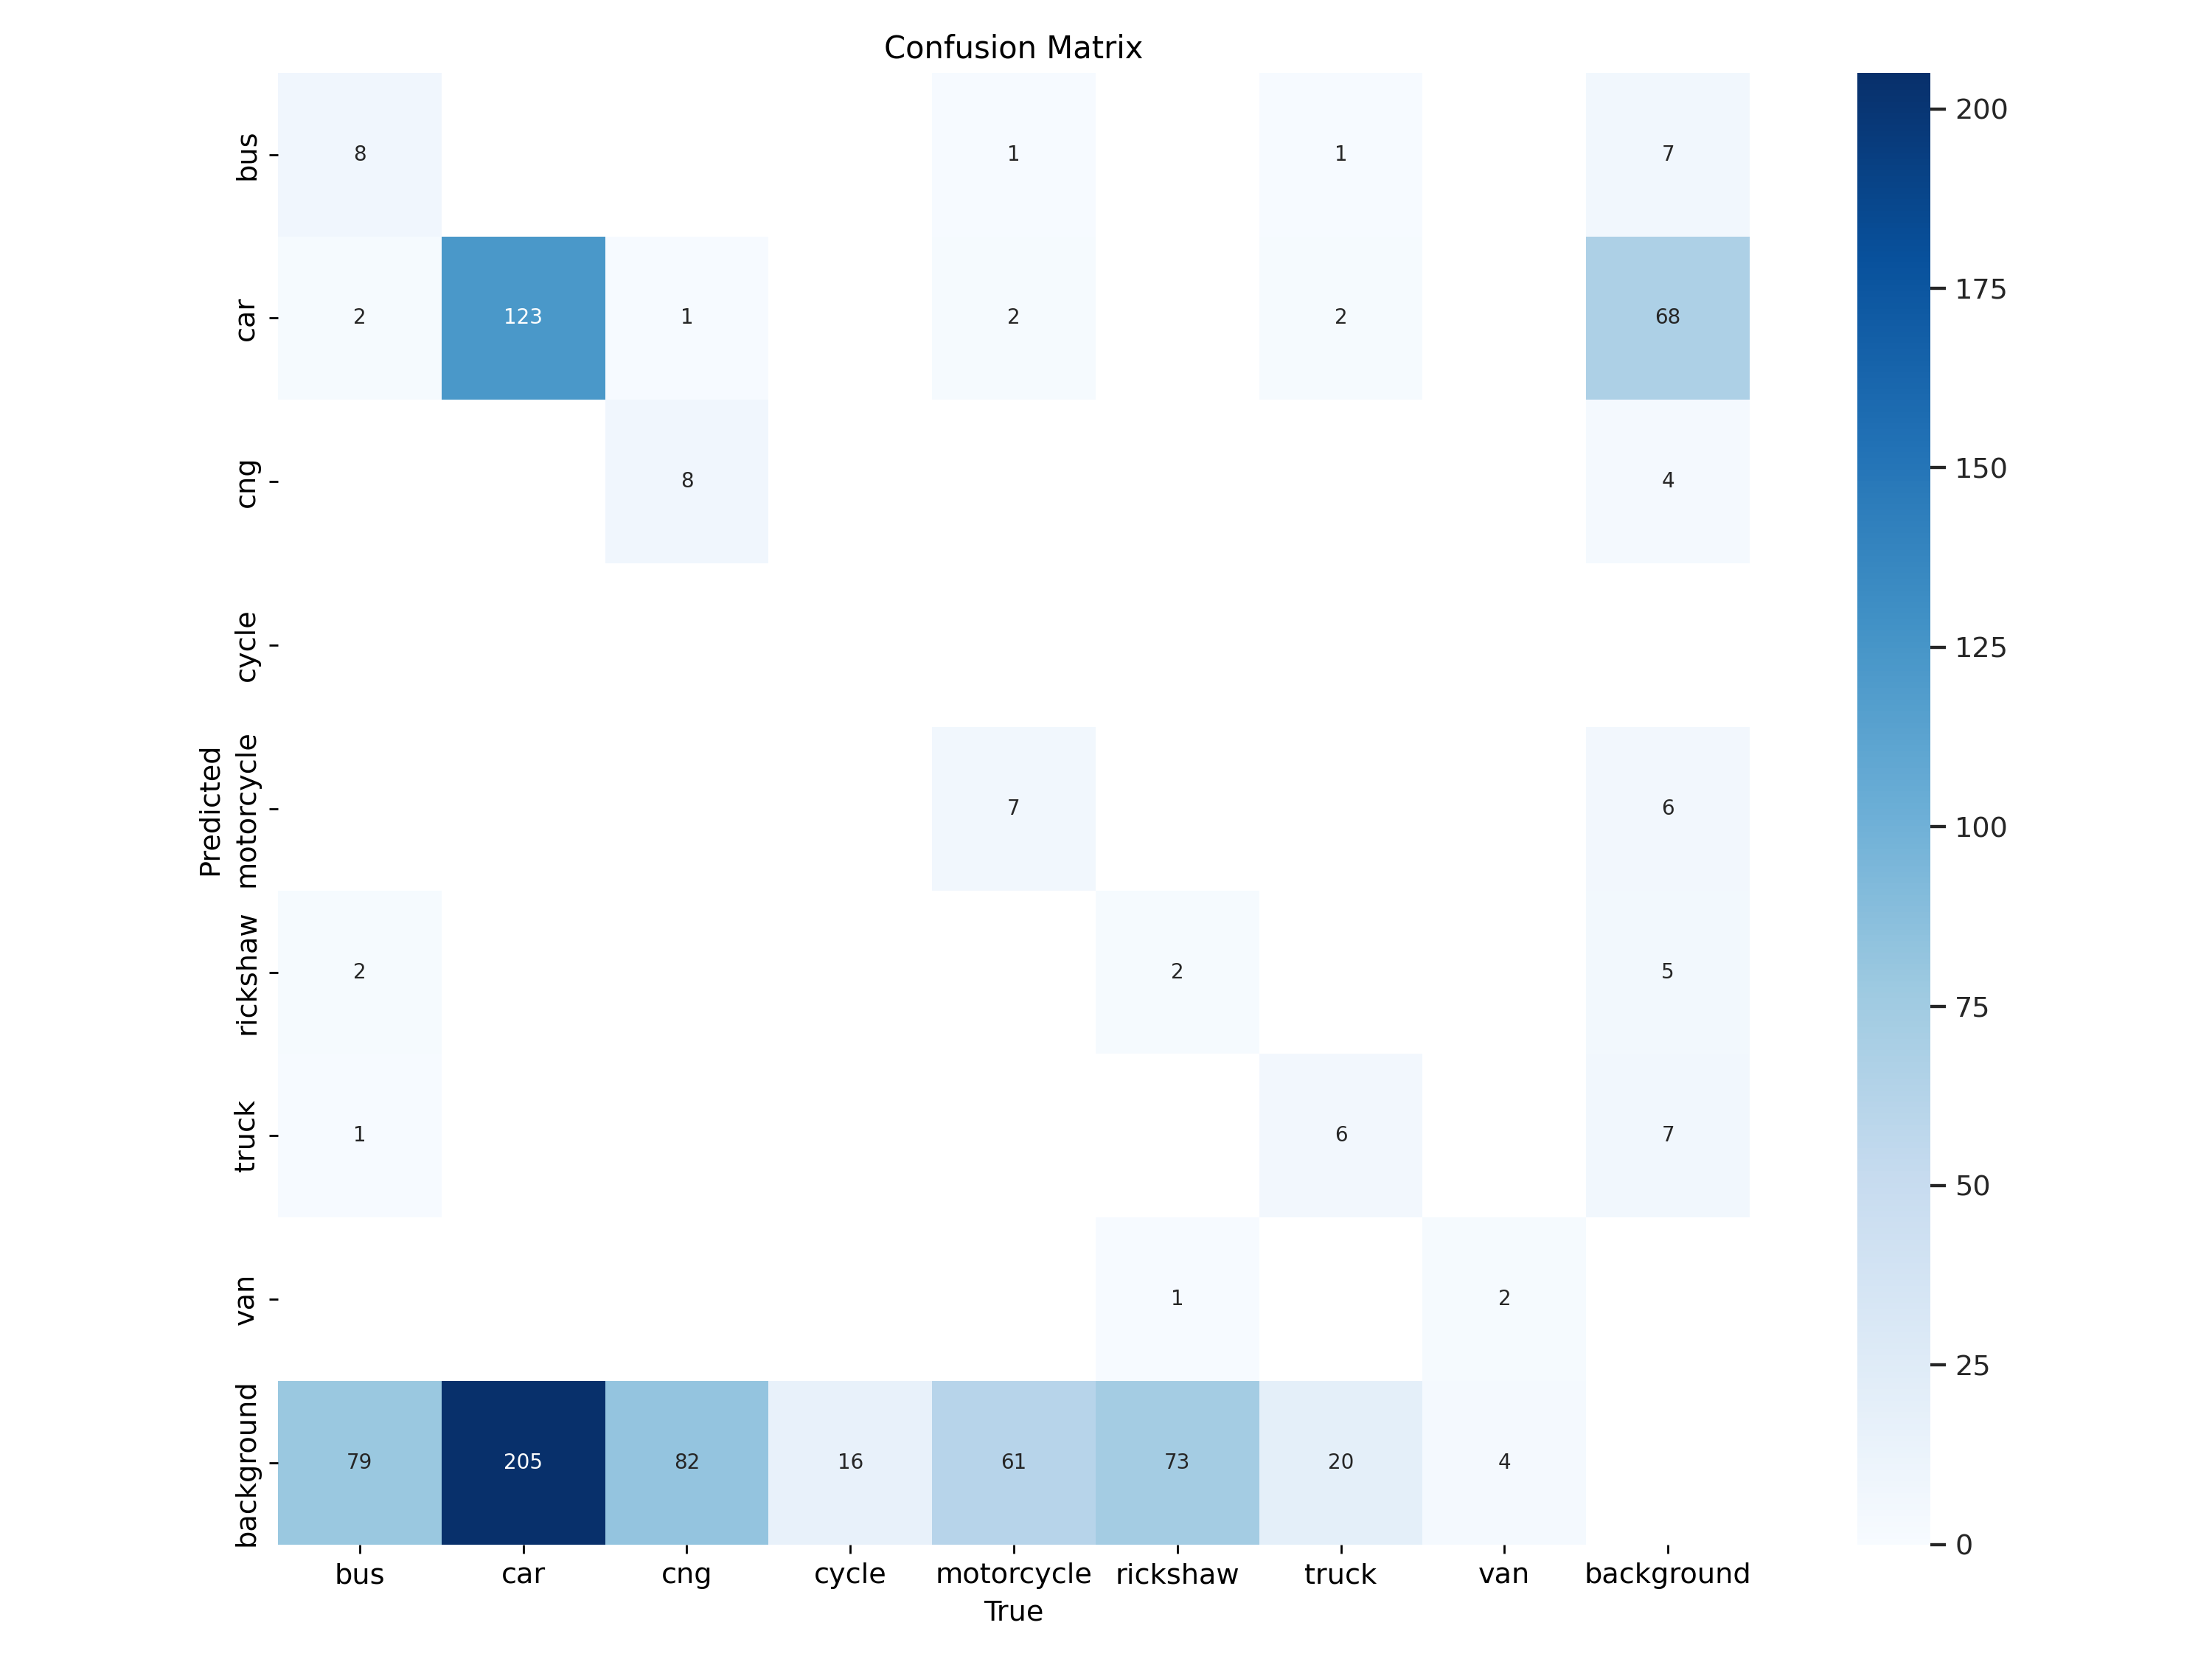

In [8]:
from IPython.display import Image, display

# Display the confusion matrix saved during validation
confusion_matrix_path = 'runs/detect/bd_vehicles_scratch/confusion_matrix.png'
display(Image(filename=confusion_matrix_path))

In [9]:
# Access per-class precision and recall
class_names = model.names # Get class names
print("Per-Class Precision:")
for i, p in enumerate(metrics_exp1.box.p):
    print(f"  {class_names[i]}: {p:.4f}")

print("\nPer-Class Recall:")
for i, r in enumerate(metrics_exp1.box.r):
    print(f"  {class_names[i]}: {r:.4f}")

# Calculate and print per-class F1-score
print("\nPer-Class F1-Score:")
for i in range(len(class_names)):
    p_class = metrics_exp1.box.p[i]
    r_class = metrics_exp1.box.r[i]
    f1_class = 2 * (p_class * r_class) / (p_class + r_class) if (p_class + r_class) > 0 else 0
    print(f"  {class_names[i]}: {f1_class:.4f}")

Per-Class Precision:
  bus: 0.2521
  car: 0.5269
  cng: 0.4210
  cycle: 0.0000
  motorcycle: 0.1673
  rickshaw: 0.1672
  truck: 0.5302
  van: 0.8061

Per-Class Recall:
  bus: 0.0652
  car: 0.3689
  cng: 0.0659
  cycle: 0.0000
  motorcycle: 0.0704
  rickshaw: 0.0526
  truck: 0.2726
  van: 0.3333

Per-Class F1-Score:
  bus: 0.1036
  car: 0.4340
  cng: 0.1140
  cycle: 0.0000
  motorcycle: 0.0991
  rickshaw: 0.0801
  truck: 0.3601
  van: 0.4716


Thank You For Checking...